In [1]:
%matplotlib inline

import matplotlib.pyplot as plt 
import pandas 
import numpy as np 
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import BaggingRegressor

In [2]:
df = pandas.read_csv( '../data_sets/experimental/bglb_all.csv', index_col=0 ) 
f = pandas.read_csv( '../data_sets/rosetta/enzyme_design_noncovalent_2.csv', index_col=0 )

In [3]:
df[ 'kcat' ].dropna().shape

(116,)

In [4]:
my_f = [ i for i in f.columns if 'cst' not in i and len(i) != 4 and 'desc' not in i ] 

In [5]:
my_cst = 'kcat'  # should be a list? 
data = f.join( df[ [ my_cst ] ] )[ my_f + [my_cst] ]
data[ 'name' ] = data.index
data = data.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 1 ) ) 

data = data.dropna()
scl = StandardScaler()
X = scl.fit_transform( data[ my_f ] )
y = np.log10( data[ 'kcat' ] / 880 ).as_matrix().ravel()

print X.shape
print y.shape 

(89, 48)
(89,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


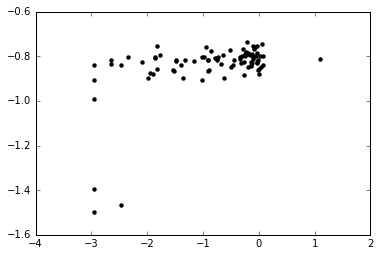

In [6]:
EN = ElasticNetCV( l1_ratio=[.2,.5,.9,.95,.99], cv=10, max_iter=1e4 ) 
EN.fit( X, y ) 
preds = EN.predict( X ) 
plt.scatter( y, preds, c='k', lw=0 )

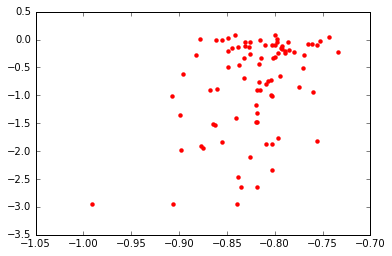

In [7]:
edited_preds = [ (i,j) for (i,j) in zip(preds,y) if i > -1.2 and j < .5 ] 
plt.scatter( *zip(*edited_preds), c='r', lw=0 )

In [11]:
l1_ratio = [ .1, .5, .7, .9, .95, .99, 1 ]
net = ElasticNetCV( l1_ratio=l1_ratio, cv=10, max_iter=1e3 ) 
bag = BaggingRegressor( net, n_estimators=30, n_jobs=-1, oob_score=True )
bag.fit( X, y )
preds = bag.predict( X )

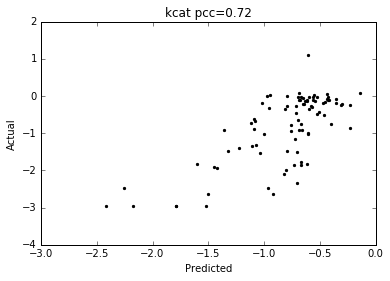

In [12]:
#plt.subplot( 1, 3, i + 1 ) 
plt.scatter( preds, y, marker='.', color='k' )
plt.xlabel( 'Predicted' ); plt.ylabel( 'Actual' )
r = pearsonr( preds, y )[0].round(2)
plt.title( '{} pcc={}'.format( 'kcat', r ) ) 

In [ ]:
constants = [ 'kcat', 'km', 'kcatkm' ]

plt.figure( figsize=( 9, 2.5 ) ) 

for i, constant in enumerate( constants ):
    
#     J = pandas.read_csv( 'training_sets/{}.csv'.format( constant ), index_col=0 ).as_matrix()  
#     X = J[:, :-1]
#     y = J[:, -1:].ravel()
    
#     l1_ratio = [ .1, .5, .7, .9, .95, .99, 1 ]
    
#     net = ElasticNetCV( l1_ratio=l1_ratio, cv=10, max_iter=-1 ) 
#     bag = BaggingRegressor( net, n_estimators=30, n_jobs=-1, oob_score=True )
#     bag.fit( X, y )
#     preds = bag.predict( X )

    plt.subplot( 1, 3, i + 1 ) 
#     plt.scatter( preds, y, marker='.', color='k' )
    plt.xlabel( 'Predicted' ); plt.ylabel( 'Actual' )
#     r = pearsonr( preds, y )[0].round(2)
#     plt.title( '{} pcc={}'.format( constant, r ) ) 